Import output data from GAMS

In [1]:
def load_data():
    import csv

    csvfile = open('./input_data/pegas_Xports.dat')
    reader = csv.DictReader(csvfile, fieldnames=['ttot', 'regi', 'val'], delimiter=',', quotechar='"')
    pm_Xports = [row for row in reader]

    csvfile = open('./input_data/pegas_Mports.dat')
    reader = csv.DictReader(csvfile, fieldnames=['ttot', 'regi', 'val'], delimiter=',', quotechar='"')
    pm_Mports = [row for row in reader]

    csvfile = open('./output_data/shipmentquan.dat')
    reader = csv.DictReader(csvfile, fieldnames=['ttot', 'regi', 'regi2', 'enty', 'teTranspMode', 'val'], delimiter=',', quotechar='"')
    vm_shipmentquan = [row for row in reader]

    all_regi = []
    for e in pm_Xports:
        if e['regi'] not in all_regi: all_regi.append(e['regi'])
    
    return pm_Xports, pm_Mports, vm_shipmentquan, all_regi

In [2]:
def getSankey1FromMX(var_Xports: list, var_Mports: list, year: int):
    Xports = [e for e in var_Xports if e['ttot']=="{0}".format(year)]
    Mports = [e for e in var_Mports if e['ttot']=="{0}".format(year)]

    lbl1 = [e['regi'] for e in Xports]
    lbl2 = [e['regi'] for e in Mports]
    label = lbl1 + ["pool"] + lbl2

    vals1 = [float(e['val']) for e in Xports]
    vals2 = [float(e['val']) for e in Mports]
    value = vals1 + vals2

    src1 = [lbl1.index(e['regi']) for e in Xports]
    src2 = [len(lbl1) for e in Mports]
    source = src1 + src2

    tar1 = [len(lbl1) for e in Xports]
    tar2 = [lbl2.index(e['regi'])+len(lbl1)+1 for e in Mports]
    target = tar1 + tar2
    
    return label, source, target, value


def getSankey2FromMX(var_shipmentquan: list, all_regi:list, year: int):
    shipmentquan = [e for e in var_shipmentquan if e['ttot']=="{0}".format(year) and e['enty']=='pegas']
    
    shipmentquantot = []
    lbl1 = []
    lbl2 = []
    for regi in all_regi:
        for regi2 in all_regi:
            all_entries = [float(e['val']) for e in shipmentquan if e['regi']==regi and e['regi2']==regi2]
            if all_entries:
                shipmentquantot.append({'regi': regi, 'regi2': regi2, 'val': sum(all_entries)})
                if regi not in lbl1: lbl1.append(regi)
                if regi2 not in lbl2: lbl2.append(regi2)
    label = lbl1 + lbl2

    value = [float(e['val']) for e in shipmentquantot]

    source = [lbl1.index(e['regi']) for e in shipmentquantot]

    target = [lbl2.index(e['regi2'])+len(lbl1) for e in shipmentquantot]
    
    return label, source, target, value

In [3]:
import plotly.graph_objects as go

def plotSankeyDiagrams(mode = 1, year = 2030):
    pm_Xports, pm_Mports, vm_shipmentquan, all_regi = load_data()
    
    if(mode==1):
        label, source, target, value = getSankey1FromMX(pm_Xports, pm_Mports, year)
        title="Trade flows, pooled"
    elif(mode==2):
        label, source, target, value = getSankey2FromMX(vm_shipmentquan, all_regi, year)
        title="Trade flows, disaggregated"
    else: raise Exception("Unknown plot mode!")

    fig = go.Figure(data=[go.Sankey(
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(color = "black", width = 0.5),
          label = label,
          color = "blue"
        ),
        link = dict(
          source = source,
          target = target,
          value = value
      ))])

    fig.update_layout(title_text=title, font_size=10)
    fig.show()

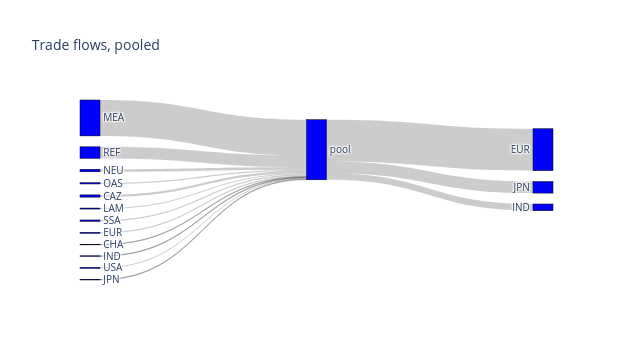

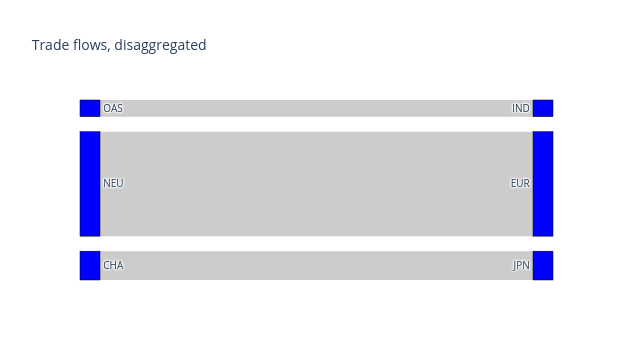

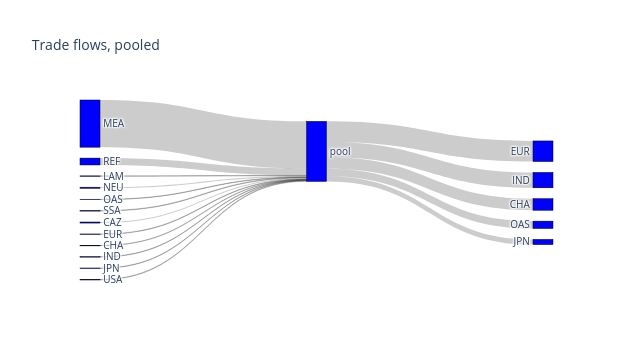

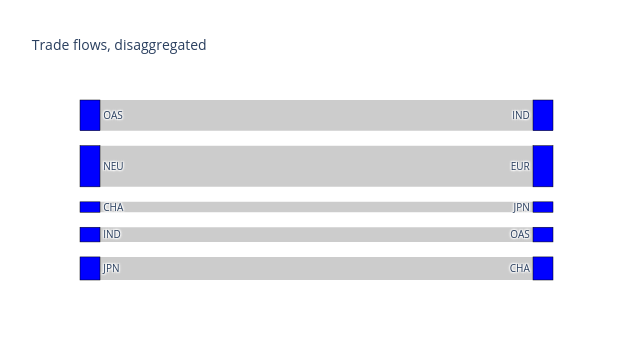

In [9]:
plotSankeyDiagrams(1,2030)
plotSankeyDiagrams(2,2030)

plotSankeyDiagrams(1,2050)
plotSankeyDiagrams(2,2050)